In [1]:
from google.colab import drive

drive.mount('/content/drive')

s="/content/drive/MyDrive/Colab Notebooks/CONSUMO SEVILLA DIARIO.csv"
dataset_sevd = open(s, "r")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
sevd = pd.read_csv(s, sep=';', decimal=',', encoding='ISO-8859-1')

In [4]:
sevd

,Timestamp,DIASEM,CONSUMO,LLUVIA,TEMPERATURA,ANNO,MES
0,1/1/06 8:00,domingo,218.7,0.0,17.5,2006,1
1,2/1/06 8:00,lunes,249.2,0.0,17.3,2006,1
2,3/1/06 8:00,martes,269.5,0.0,16.0,2006,1
3,4/1/06 8:00,miércoles,268.9,0.0,15.2,2006,1
4,5/1/06 8:00,jueves,256.9,0.4,15.2,2006,1
...,...,...,...,...,...,...,...
4109,31/3/17 8:00,viernes,206.5,0.0,23.3,2017,3
4110,1/4/17 8:00,sábado,189.4,0.0,23.4,2017,4
4111,2/4/17 8:00,domingo,196.5,0.0,25.3,2017,4
4112,3/4/17 8:00,lunes,211.6,0.0,26.7,2017,4


In [5]:
sevd_sinNA = sevd.dropna()

In [6]:
sevd_sinNA

,Timestamp,DIASEM,CONSUMO,LLUVIA,TEMPERATURA,ANNO,MES
0,1/1/06 8:00,domingo,218.7,0.0,17.5,2006,1
1,2/1/06 8:00,lunes,249.2,0.0,17.3,2006,1
2,3/1/06 8:00,martes,269.5,0.0,16.0,2006,1
3,4/1/06 8:00,miércoles,268.9,0.0,15.2,2006,1
4,5/1/06 8:00,jueves,256.9,0.4,15.2,2006,1
...,...,...,...,...,...,...,...
4109,31/3/17 8:00,viernes,206.5,0.0,23.3,2017,3
4110,1/4/17 8:00,sábado,189.4,0.0,23.4,2017,4
4111,2/4/17 8:00,domingo,196.5,0.0,25.3,2017,4
4112,3/4/17 8:00,lunes,211.6,0.0,26.7,2017,4


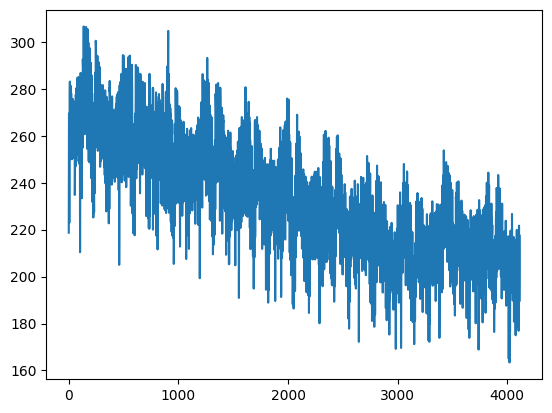

In [7]:
from matplotlib import pyplot

pyplot.plot(sevd_sinNA['CONSUMO'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


4112    207.480966
4113    209.527519
4114    212.773343
4115    208.698473
4116    209.866984
           ...    
4472    211.922565
4473    208.514280
4474    205.703695
4475    207.470202
4476    207.999415
Length: 365, dtype: float64


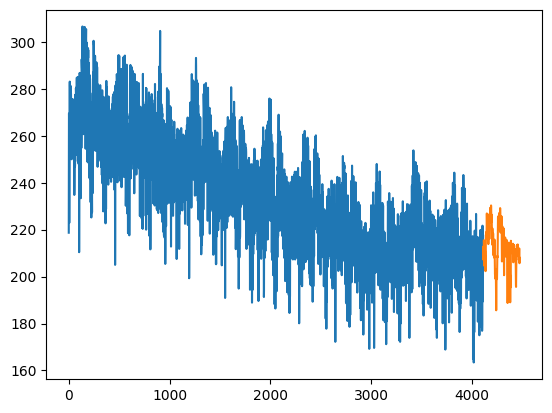

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hwconsumod = ExponentialSmoothing(sevd_sinNA["CONSUMO"], seasonal_periods=365, trend="add", seasonal="add").fit()

pyplot.plot(sevd_sinNA["CONSUMO"])

pyplot.plot(hwconsumod.forecast(365))

print(hwconsumod.forecast(365))

0       255.021370
1       247.417887
2       240.779424
3       256.324125
4       257.429730
           ...    
4109    207.651628
4110    204.939963
4111    199.219661
4112    199.715445
4113    202.563153
Length: 4112, dtype: float64


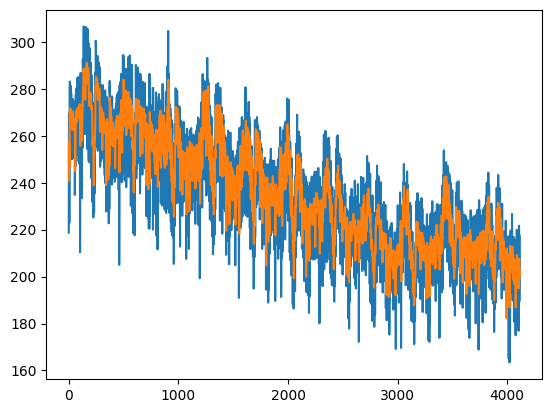

In [32]:
pyplot.plot(sevd_sinNA["CONSUMO"])

pyplot.plot(hwconsumod.predict(0))

print(hwconsumod.predict(0))

In [31]:
from sklearn.metrics import mean_absolute_error

predicciones = hwconsumod.predict(0)

mae = mean_absolute_error(sevd_sinNA["CONSUMO"], predicciones)

print("MAE:", mae)

MAE: 11.438261499645659


In [33]:
sum(sevd_sinNA['CONSUMO'])

970865.3000000035